In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import datetime
import seaborn as sns

In [28]:
%matplotlib inline

In [29]:
# set maximum number of columsn to be displayed
pd.set_option("display.max_columns", 100)

In [2]:
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
train.skew()
# since seniorcitizen is categorical feature, 0 means no, 1 means yes, so we can ignore the number here. 
# tenure skewness is closer to 0, which is relative normal distrubted, while montlyCharges is negative, 
# which is towards the left hand side of the distribution

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

# 1. check missing values

In [8]:
train.isna().sum()
# there is no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Data Visualization Understanding

### Churn 

In [25]:
def plot_stacked_bar(dataframe, title_, size_ = (18,10), rot_=0, legend_ = "uppder right"):
    ax = dataframe.plot(kind="bar", stacked = True, figsize = size_, rot = rot_, title = title_)
    annotate_stacked_bars(ax, textsize = 14)
    plt.legend(["Retention", "Churn"], loc = legend_)
    plt.show()
def annotate_stacked_bars(ax,pad = 0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == "0.0":
            continue
        ax.annotate(value, ((p.get_x()+p.get_width()/2)*pad-0.05,
                           (p.get_y()+p.get_height()/2)*pad),
                   color = colour, size = textsize,)

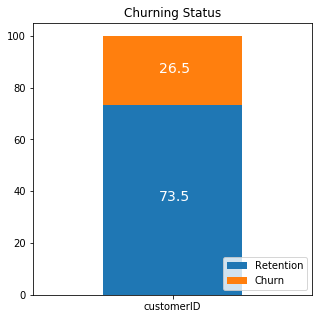

In [26]:
churn = train[['customerID', "Churn"]]
churn_total = churn.groupby(churn["Churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stacked_bar(churn_percentage.transpose(), "Churning Status", (5,5), legend_="lower right")


There is 26.5% of the total cusotmers have churned

# Gender vs. Churn

In [16]:
gender = train[['customerID', 'gender', 'Churn']]
gender.head()

,customerID,gender,Churn
0,7590-VHVEG,Female,No
1,5575-GNVDE,Male,No
2,3668-QPYBK,Male,Yes
3,7795-CFOCW,Male,No
4,9237-HQITU,Female,Yes


In [17]:
gender = gender.groupby([gender["gender"], gender["Churn"]])["customerID"].count().unstack(level=1)
gender

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [18]:
gender_percent = (gender.div(gender.sum(axis="columns"), axis="index")*100).sort_values(by=["Yes"], ascending = False)
gender_percent

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


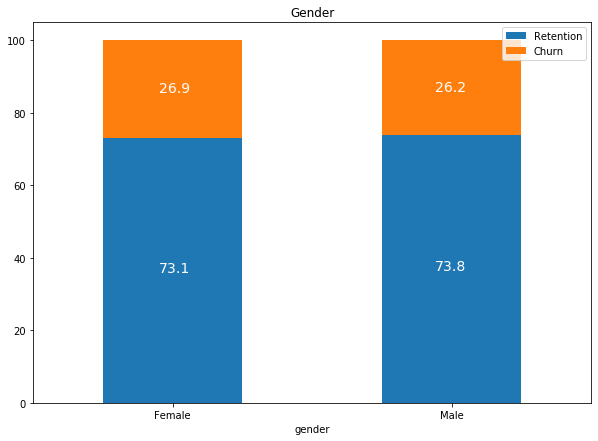

In [37]:
plot_stacked_bar(gender_percent, "Gender",(10,7),legend_="upper right" )